# Document the Insights
- The IMDB Keras dataset is a popular benchmark dataset used for natural language processing (NLP) tasks, particularly for text classification.


- It consists of movie reviews from the Internet Movie Database (IMDB), is commonly used for training and evaluating machine learning models, particularly neural networks, for NLP tasks such as sentiment analysis.


- This dataset contains 50,000 movie reviews, split into 25,000 for training and 25,000 for testing.


- And The labels are binary, with 0 indicating a negative review and 1 indicating a positive review, and its distribution is roughly balanced, with 25000 negative reviews and 25000 positive reviews in both the training and testing sets.


- The reviews pre-processed by converting all words to lowercase, removing punctuation, and tokenizing the text into sequences of words. The words are then indexed based on their frequency, with the most frequent words given lower integer values, the most common words in the dataset include "the", "and", "a", "of", and "to", which are typical, stop words.


- It has vocabulary size is 88587 unique words, indicating a wide range of language used in the reviews, and the length of each review varies, with the longest review containing 2494 words and the shortest review containing only 7 words, which is equivalent to an average 234 review length and standard deviation of 172 words.

# Libraries

In [ ]:
# plot
import matplotlib.pyplot as plt
# numpy
import numpy as np
# imdb dataset
from keras.datasets import imdb
# split
from sklearn.model_selection import train_test_split
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalMaxPooling1D, BatchNormalization, Conv1D, Embedding, ZeroPadding2D, MaxPooling1D, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf

# load the dataset

In [ ]:
top_words = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Data Description

In [ ]:
# Print the number of samples
print(f"Number of training samples: {len(X_train)} movie reviews")
print(f"Number of testing samples: {len(X_test)} movie reviews")

# Print the shape of the input data
print("Shape of the training data:", X_train.shape)
print("Shape of the testing data:", X_test.shape)

# Print the number of unique labels
print("Number of unique labels:", len(set(y_train)))

#print label distribution
labels = np.concatenate([y_train, y_test])
positive = sum(labels) #sun of ones
negative = len(labels) - positive
print(f"Positive labels: {positive} positive label")
print(f"Negative labels: {negative} negative label")

# Print the vocabulary size
max_index_value = max([max(sequence) for sequence in X_train + X_test])
print(f"Vocabulary size: {max_index_value + 1} unique words")

# Print review length
sequences = np.concatenate([X_train, X_test])
sequence_lengths = [len(sequence) for sequence in sequences]
print("Maximum review length:", max(sequence_lengths))
print("Minimum review length:", min(sequence_lengths))
print("Average review length:", np.mean(sequence_lengths))

Number of training samples: 25000 movie reviews
Number of testing samples: 25000 movie reviews
Shape of the training data: (25000,)
Shape of the testing data: (25000,)
Number of unique labels: 2
Positive labels: 25000 positive label
Negative labels: 25000 negative label
Vocabulary size: 20000 unique words
Maximum review length: 2494
Minimum review length: 7
Average review length: 234.75892


# Data Visualization

### Bar plot of label distribution


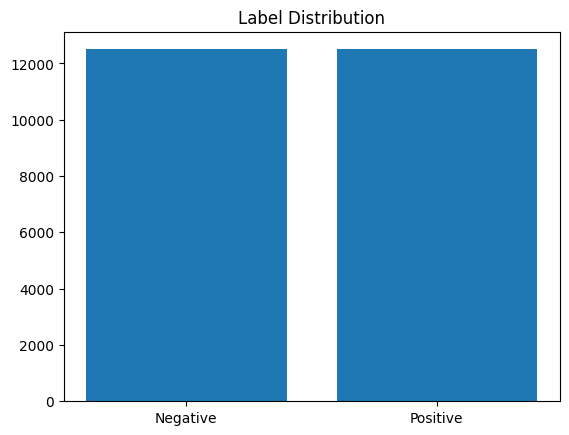

In [ ]:
# Compute label distribution
unique, counts = np.unique(y_train, return_counts=True)

# Create a bar plot of label distribution
plt.bar(unique, counts)
plt.xticks(unique, ['Negative', 'Positive'])
plt.title('Label Distribution')
plt.show()

### Histogram of review lengths

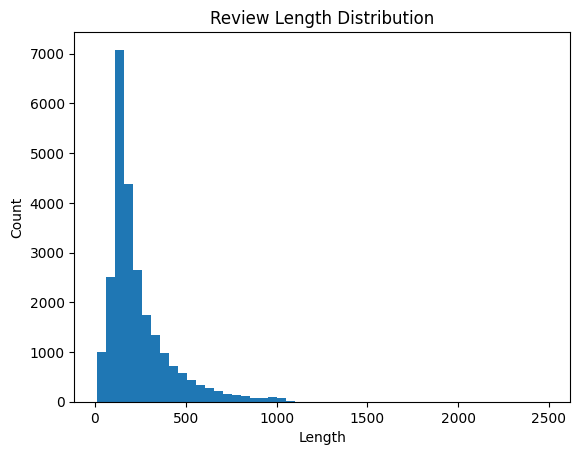

In [ ]:
# Compute review lengths
lengths = [len(review) for review in X_train]

# Create a histogram of review lengths
plt.hist(lengths, bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

## Pad sequance

In [ ]:
# pad dataset to a maximum review length in words
max_words = 1000
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## split training data into training and validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

# Version-1

In [ ]:
# create the model
model = Sequential()

model.add(Embedding(top_words, 50, input_length=max_words, embeddings_regularizer=regularizers.L2(0.05)))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())

model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 conv1d_10 (Conv1D)          (None, 1000, 32)          4832      
                                                                 
 batch_normalization_7 (Batc  (None, 1000, 32)         128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy'),
            tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.25, verbose=1)]

In [ ]:
hist = model.fit(X_train, y_train, batch_size=16, validation_data=(X_val, y_val), validation_batch_size=16 , epochs=200, callbacks=callback)

Epoch 1/200
1329/1329 [==============================] - 10s 6ms/step - loss: 1.3018 - accuracy: 0.7276 - val_loss: 0.6789 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 2/200
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7204 - accuracy: 0.7900 - val_loss: 0.7013 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 3/200
1329/1329 [==============================] - 7s 5ms/step - loss: 0.7019 - accuracy: 0.8037 - val_loss: 0.6360 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 4/200
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7003 - accuracy: 0.8062 - val_loss: 0.6742 - val_accuracy: 0.8304 - lr: 0.0010
Epoch 5/200
1328/1329 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.8130
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1329/1329 [==============================] - 7s 5ms/step - loss: 0.6907 - accuracy: 0.8130 - val_loss: 0.6848 - val_accuracy: 0.8245 - lr: 0.0010
Epoch 6/200
1329/1329 [=======================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

782/782 [==============================] - 2s 3ms/step - loss: 0.3266 - accuracy: 0.8856
Loss = 0.327
Accuracy = 88.56 %


### visualization

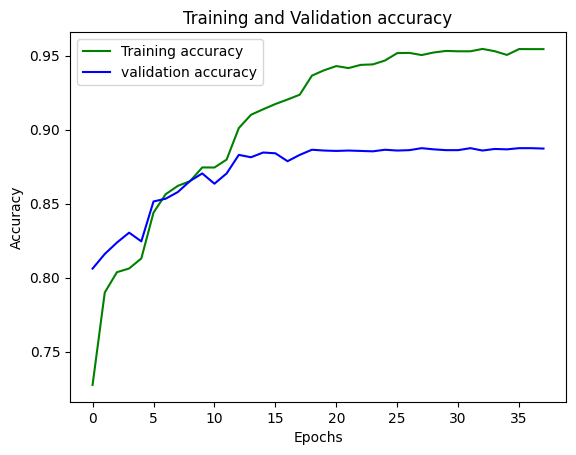

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

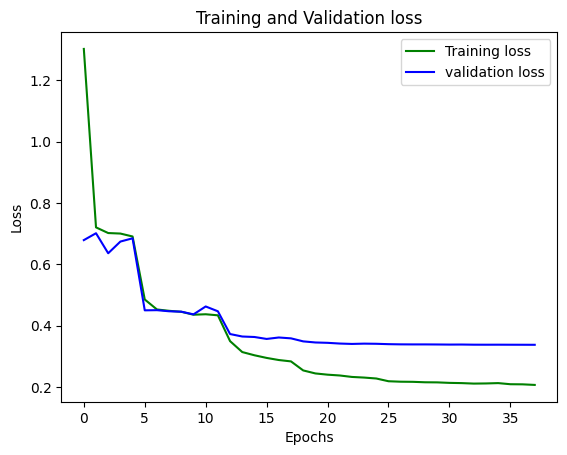

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
predict = predict > 0.5

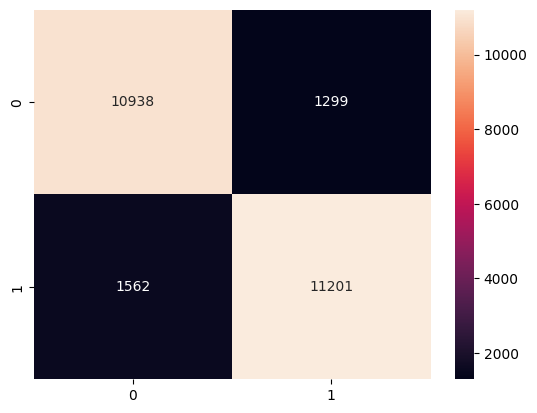

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(predict, y_test), annot=True, fmt='1');

# Version-2

### Changed Parameters
- Change Optimizer and learning rate
- batch and validation size

In [ ]:
# create the model
model = Sequential()

model.add(Embedding(top_words, 50, input_length=max_words, embeddings_regularizer=regularizers.L2(0.05)))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())

model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 conv1d_11 (Conv1D)          (None, 1000, 32)          4832      
                                                                 
 batch_normalization_8 (Batc  (None, 1000, 32)         128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_6 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy'),
            tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.25, verbose=1)]

In [ ]:
hist = model.fit(X_train, y_train, batch_size=64, validation_data=(X_val, y_val), validation_batch_size=64 , epochs=200, callbacks=callback)

Epoch 1/200
333/333 [==============================] - 4s 8ms/step - loss: 1.0615 - accuracy: 0.6864 - val_loss: 0.7616 - val_accuracy: 0.6504 - lr: 0.0050
Epoch 2/200
333/333 [==============================] - 2s 7ms/step - loss: 0.7089 - accuracy: 0.7333 - val_loss: 0.6629 - val_accuracy: 0.7221 - lr: 0.0050
Epoch 3/200
333/333 [==============================] - 3s 8ms/step - loss: 0.6953 - accuracy: 0.7470 - val_loss: 0.8745 - val_accuracy: 0.6624 - lr: 0.0050
Epoch 4/200
330/333 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.7567
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
333/333 [==============================] - 3s 8ms/step - loss: 0.6822 - accuracy: 0.7569 - val_loss: 1.0082 - val_accuracy: 0.6229 - lr: 0.0050
Epoch 5/200
333/333 [==============================] - 3s 7ms/step - loss: 0.5357 - accuracy: 0.7879 - val_loss: 0.4967 - val_accuracy: 0.8043 - lr: 0.0012
Epoch 6/200
333/333 [==============================] - 2s 7

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

782/782 [==============================] - 3s 4ms/step - loss: 0.3730 - accuracy: 0.8574
Loss = 0.373
Accuracy = 85.74 %


### visualization

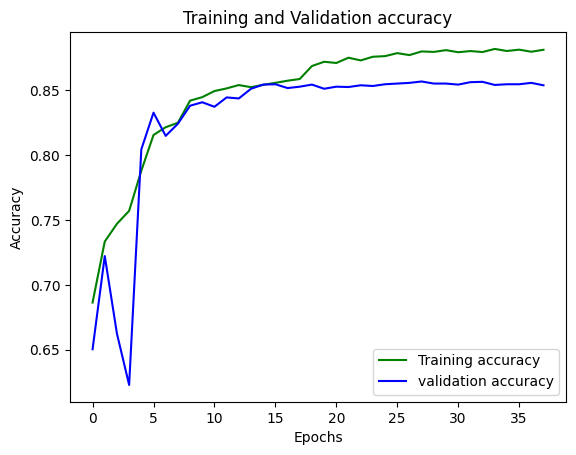

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

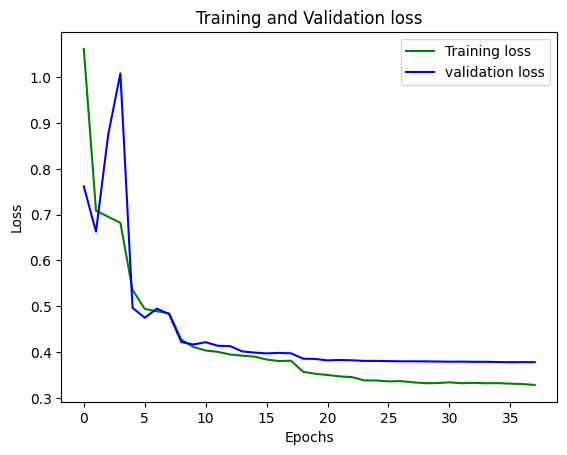

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
predict = predict > 0.5

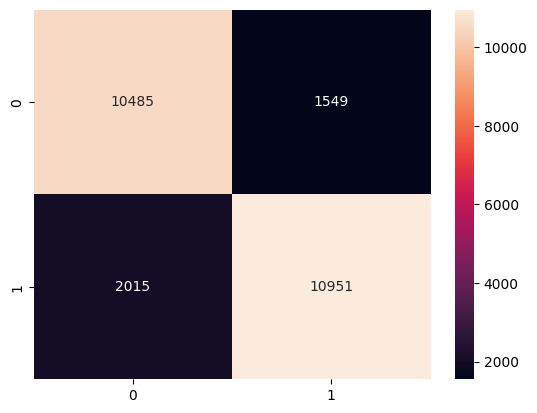

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(predict, y_test), annot=True, fmt='1');

## Version-3

## Changed Parameters
- Increase Model architecture
- batch and validation size
- MaxPooling1D
- BatchNormalization

In [ ]:
# create the model
model = Sequential()

model.add(Embedding(top_words, 50, input_length=max_words))


model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(strides=1))
model.add(Conv1D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(strides=1))

model.add(Dropout(0.25))

model.add(Flatten())  

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 1000, 50)          1000000   
                                                                 
 conv1d_12 (Conv1D)          (None, 1000, 32)          4832      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 999, 32)          0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, 999, 16)           1552      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 998, 16)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 998, 16)         

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy'),
            tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.25, verbose=1)]

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), validation_batch_size=32 , epochs=200, callbacks=callback)

Epoch 1/200
665/665 [==============================] - 80s 115ms/step - loss: 0.4044 - accuracy: 0.8030 - val_loss: 0.3523 - val_accuracy: 0.8661 - lr: 0.0010
Epoch 2/200
665/665 [==============================] - 36s 54ms/step - loss: 0.1703 - accuracy: 0.9387 - val_loss: 0.8585 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 3/200
665/665 [==============================] - 25s 37ms/step - loss: 0.2005 - accuracy: 0.9198 - val_loss: 0.3299 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/200
665/665 [==============================] - 18s 26ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.4065 - val_accuracy: 0.8656 - lr: 0.0010
Epoch 5/200
665/665 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9894
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
665/665 [==============================] - 15s 22ms/step - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.4732 - val_accuracy: 0.8779 - lr: 0.0010
Epoch 6/200
665/665 [===========================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

782/782 [==============================] - 3s 3ms/step - loss: 0.7874 - accuracy: 0.8741
Loss = 0.787
Accuracy = 87.41 %


### visualization

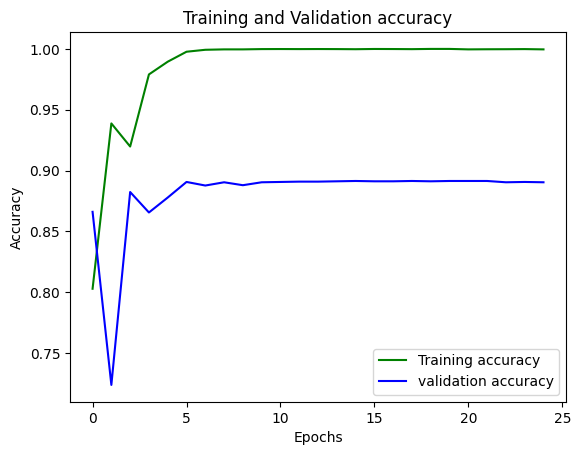

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

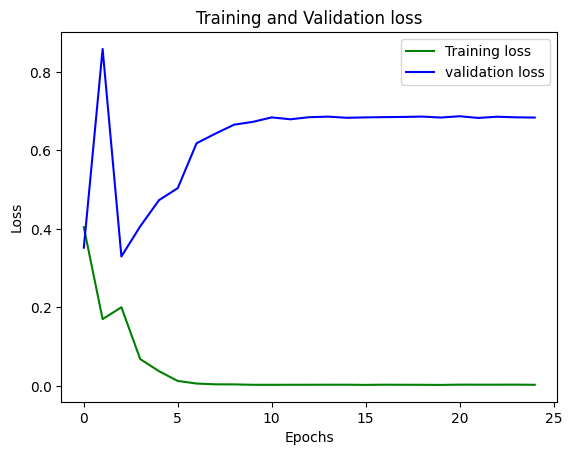

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
predict = predict > 0.5

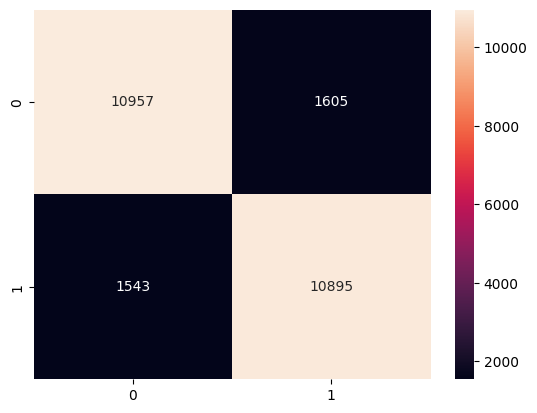

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(predict, y_test), annot=True, fmt='1');